<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/News_nao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate%20world%20championships&sortBy=publishedAt&apiKey={API_KEY}"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate%20world%20championships&sortBy=publishedAt&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
      
df.to_csv("output.csv")
df


,source,author,title,description,url,urlToImage,publishedAt,content
0,USA Today,Nolan King,On the Doorstep: 5 fighters who could make UFC...,"For those who make it to the highest stage, th...",https://mmajunkie.usatoday.com/lists/ufc-on-th...,https://mmajunkie.usatoday.com/wp-content/uplo...,2023-03-14T13:30:33Z,Image via Fury FC\r\nRecord: 5-0Age: 25Weight ...
1,Los Angeles Times,Eduard Cauich,Mexican football star Diana Flores' Super Bowl...,The Mexican flag football quarterback is rever...,https://www.latimes.com/sports/story/2023-03-1...,https://ca-times.brightspotcdn.com/dims4/defau...,2023-03-13T12:30:16Z,"Her fans know that Diana Flores is a slippery,..."
2,Thefreedictionary.com,None,Chuck Norris (1940),"Carlos ""Chuck"" Norris is an American martial a...",https://encyclopedia.thefreedictionary.com/Chu...,http://img.tfd.com/TFDlogo1200x1200.png,2023-03-10T05:00:00Z,This article is about the American martial art...
3,Screen Rant,Sarah Beth Waldrop,What Choo Sung-hoon's Done Since Physical 100 ...,Physical 100's Choo Sung-hoon performed well o...,https://screenrant.com/physical-100-choo-sung-...,https://static1.srcdn.com/wordpress/wp-content...,2023-03-01T22:20:20Z,Choo Sung-hoon became instantly popular on Net...
4,AllAfrica - Top Africa News,None,Rwanda's Top Female Referees,[New Times] Competitive sport has been an over...,https://allafrica.com/stories/202303010270.html,https://cdn08.allafrica.com/static/images/stru...,2023-03-01T10:39:30Z,Competitive sport has been an overwhelmingly m...
5,MMA Mania,SethGeko,Krylov vs. Spann Breakdown,Twitter: @DadHallOfFamer \r\n\r\n\r\nWordpress...,https://www.mmamania.com/2023/2/23/23612095/kr...,https://cdn.vox-cdn.com/uploads/community/sbnu...,2023-02-23T17:38:54Z,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
6,Vnexpress.net,VnExpress,Tỷ phú công nghệ thường chơi môn thể thao gì,"Bill Gates là tín đồ của tennis và bóng ném, t...",https://vnexpress.net/ty-phu-cong-nghe-thuong-...,https://vcdn1-sohoa.vnecdn.net/2023/02/23/e0kz...,2023-02-23T05:00:00Z,"Bill Gates là tín ca tennis và bóng ném, trong..."
7,The Indian Express,Nitin Sharma,"World Cup bronze in women’s 10m air rifle, cou...",Bengaluru girl started shooting during lockdow...,https://indianexpress.com/article/sports/sport...,https://images.indianexpress.com/2023/02/Tilot...,2023-02-21T17:47:19Z,In 2020 during the Covid-19 lockdown and subse...


In [ ]:
from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

nwe_date

https://newsapi.org/v2/everything?q=karate&from=2023-3-22&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-21&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-20&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-19&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-18&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-17&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-16&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-15&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-14&sortBy

'https://newsapi.org/v2/everything?q=karate&from=2023-2-21&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473'

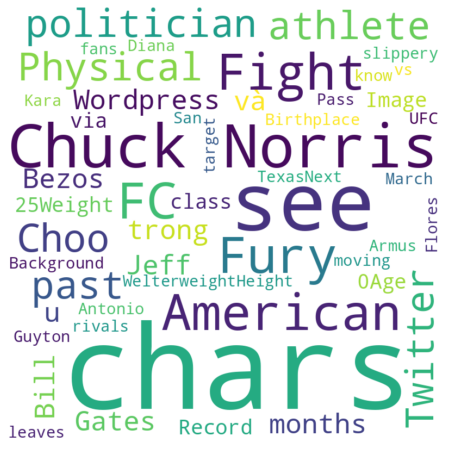

In [110]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(df['content'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=None, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Création de la liste des stopwords
stopwords = set(STOPWORDS)
stopwords.add('see')
stopwords.add('il')
stopwords.add('ha')
stopwords.add('na')
stopwords.add('Bezos')
stopwords.add('vs')
stopwords.add('March')
stopwords.add('leaves')
stopwords.add('Kara')
stopwords.add('San')


# Création du nuage de mots sans les stopwords
wordcloud = WordCloud(stopwords=stopwords).generate(text)


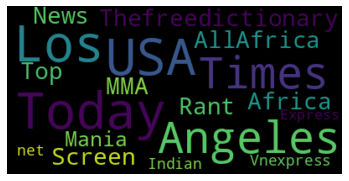

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv('/content/output.csv')

# Concaténation de tous les textes dans une seule chaîne de caractères
text = ' '.join(df['source'].tolist())

# Création du nuage de mots
wordcloud = WordCloud(max_words=50).generate(text)


# Affichage du nuage de mots
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


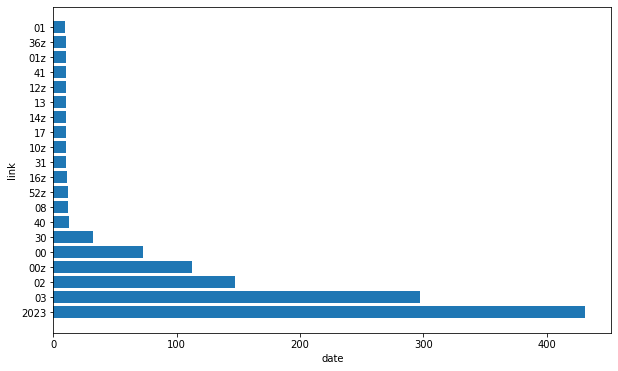

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

publishedAt = (df['publishedAt'])

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the preprocessed text data
vectorizer.fit_transform(publishedAt)

# Get the list of unique words in the text data
words = vectorizer.get_feature_names_out()

# Calculate the frequency of each word in the text data
word_freq = vectorizer.transform(publishedAt).toarray().sum(axis=0)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(words[np.argsort(word_freq)[-20:]], np.sort(word_freq)[-20:])
ax.set_xlabel('date')
ax.set_ylabel('link')
ax.invert_yaxis()
plt.show()
     

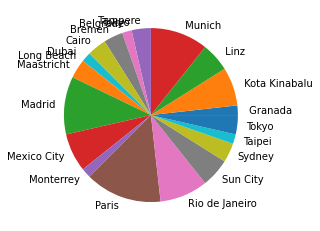

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv('KARATE.csv',sep=";")

# Calcul du total pour chaque pays
totals = df.groupby('country')['Or'].sum()

# Création du graphique camembert à partir des totaux
plt.pie(totals, labels=totals.index)
plt.show()


In [90]:
import pandas as pd

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv('KARATE.csv',sep=";")

# Affichage des noms de colonnes
print(df.columns)
df

Index(['year', 'country', 'Or', 'Argent', 'Bronze', 'Total'], dtype='object')


,year,country,Or,Argent,Bronze,Total
0,2021,Dubai,1,1,2,4
1,2018,Madrid,2,0,0,2
2,2016,Linz,3,2,4,9
3,2014,Bremen,2,3,3,8
4,2012,Paris,7,2,4,13
5,2010,Belgrade,1,3,1,5
6,2008,Tokyo,2,2,3,7
7,2006,Tampere,2,1,2,5
8,2004,Monterrey,1,4,5,10
9,2002,Madrid,3,3,4,10
